In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

data = pd.read_csv("C:\\Users\\darsh\\Downloads\\combined.csv")

In [5]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008374 entries, 0 to 1008373
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   upload_date          1008374 non-null  object
 1   uploader_sub_count   1008374 non-null  int64 
 2   view_count           1008374 non-null  int64 
 3   like_count           1008374 non-null  int64 
 4   dislike_count        1008374 non-null  int64 
 5   has_subtitles        1008374 non-null  bool  
 6   is_ads_enabled       1008374 non-null  bool  
 7   is_comments_enabled  1008374 non-null  bool  
 8   is_age_limit         1008374 non-null  bool  
 9   is_live_content      1008374 non-null  bool  
dtypes: bool(5), int64(4), object(1)
memory usage: 43.3+ MB
None
       uploader_sub_count    view_count    like_count  dislike_count
count        1.008374e+06  1.008374e+06  1.008374e+06   1.008374e+06
mean         1.218186e+05  1.774856e+04  2.638593e+02   1.428234e+01
std

In [7]:
print(data.head())

  upload_date  uploader_sub_count  view_count  like_count  dislike_count  \
0    20160205                 789         778          12              0   
1    20121001                 221          32           1              0   
2    20210601                 112          12           2              0   
3    20210523                  97          45          16              0   
4    20201124                 469          16           6              0   

   has_subtitles  is_ads_enabled  is_comments_enabled  is_age_limit  \
0          False           False                False         False   
1          False           False                 True         False   
2           True           False                 True         False   
3          False           False                 True         False   
4           True           False                 True         False   

   is_live_content  
0            False  
1            False  
2            False  
3            False  
4          

In [9]:
# Converting the boolean values to numeric 0 and 1

data['has_subtitles'] = data['has_subtitles'].astype(int)
data['is_ads_enabled'] = data['is_ads_enabled'].astype(int)
data['is_comments_enabled'] = data['is_comments_enabled'].astype(int)
data['is_age_limit'] = data['is_age_limit'].astype(int)
data['is_live_content'] = data['is_live_content'].astype(int)

print(data.head())
print(data.dtypes)


  upload_date  uploader_sub_count  view_count  like_count  dislike_count  \
0    20160205                 789         778          12              0   
1    20121001                 221          32           1              0   
2    20210601                 112          12           2              0   
3    20210523                  97          45          16              0   
4    20201124                 469          16           6              0   

   has_subtitles  is_ads_enabled  is_comments_enabled  is_age_limit  \
0              0               0                    0             0   
1              0               0                    1             0   
2              1               0                    1             0   
3              0               0                    1             0   
4              1               0                    1             0   

   is_live_content  
0                0  
1                0  
2                0  
3                0  
4          

In [11]:
# Renaming the Columns 

data.rename(columns={
    'has_subtitles': 'HasSubtitles',
    'is_ads_enabled': 'AdsEnabled',
    'is_comments_enabled': 'CommentsEnabled',
    'is_age_limit': 'AgeLimit',
    'is_live_content': 'LiveContent',
    'uploader_sub_count': 'Subcriber_count'
}, inplace=True)

print(data.columns)

Index(['upload_date', 'Subcriber_count', 'view_count', 'like_count',
       'dislike_count', 'HasSubtitles', 'AdsEnabled', 'CommentsEnabled',
       'AgeLimit', 'LiveContent'],
      dtype='object')


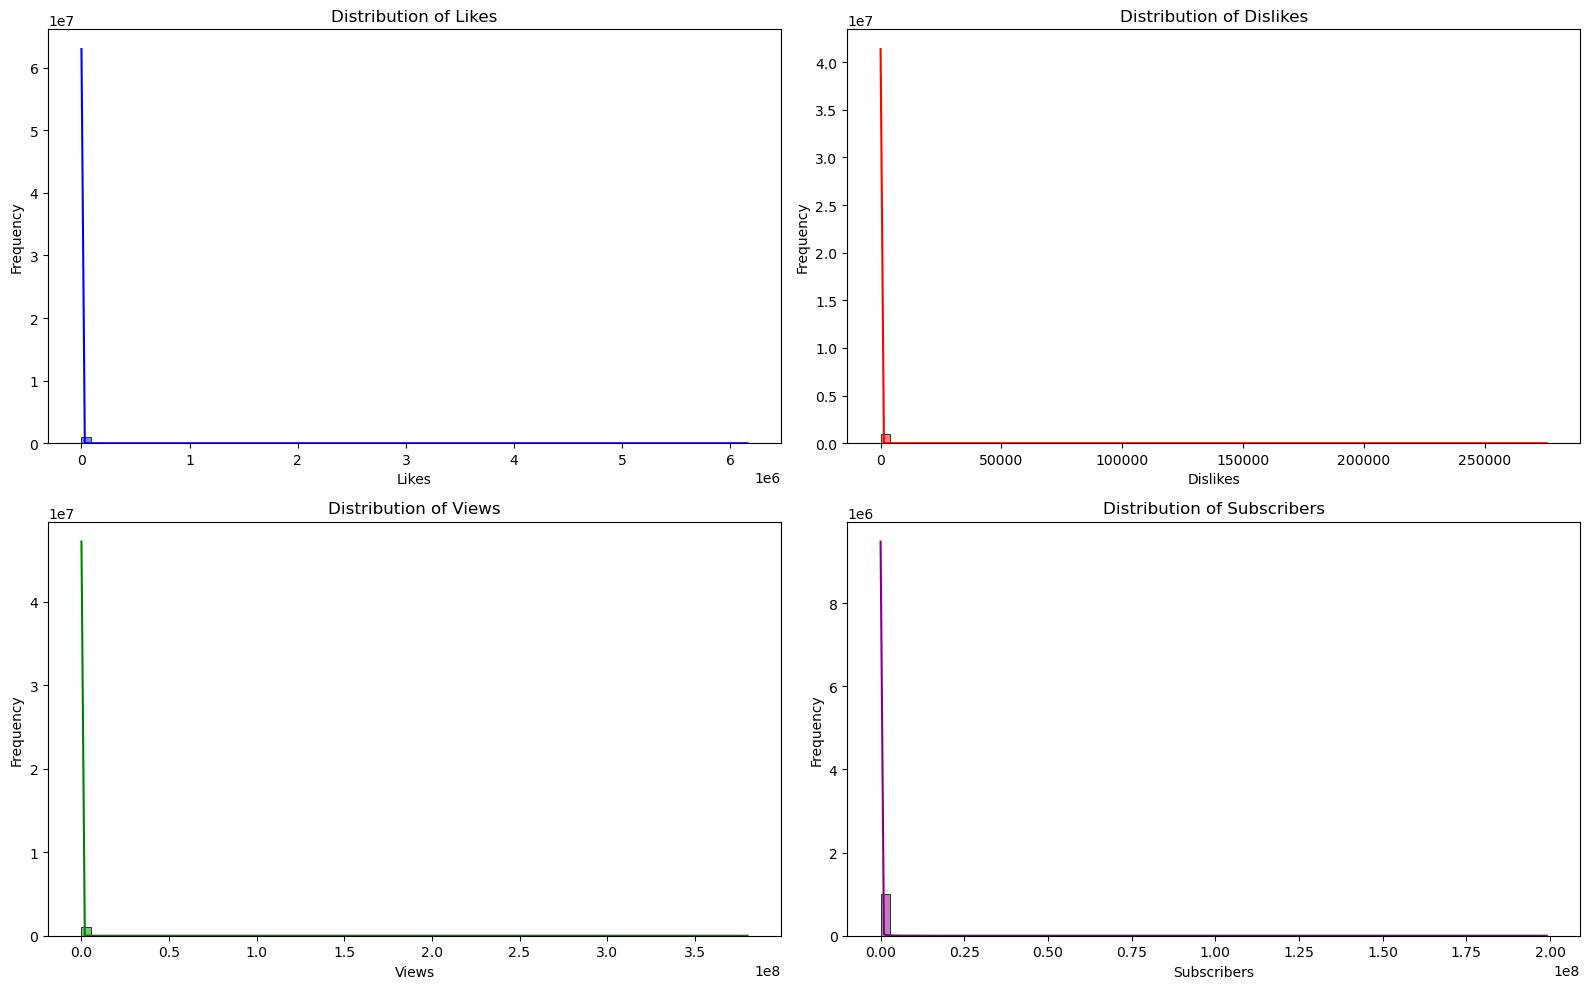

In [13]:
# Distribution of Likes , dis-likes and views 

plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['like_count'], bins=70, kde=True, color='blue')
plt.title("Distribution of Likes")
plt.xlabel("Likes")
plt.ylabel("Frequency")

plt.subplot(2, 2, 2)  
sns.histplot(data['dislike_count'], bins=70, kde=True, color='red')
plt.title("Distribution of Dislikes")
plt.xlabel("Dislikes")
plt.ylabel("Frequency")

plt.subplot(2, 2, 3) 
sns.histplot(data['view_count'], bins=70, kde=True, color='green')
plt.title("Distribution of Views")
plt.xlabel("Views")
plt.ylabel("Frequency")

plt.subplot(2, 2, 4) 
sns.histplot(data['Subcriber_count'], bins=70, kde=True, color='purple')
plt.title("Distribution of Subscribers")
plt.xlabel("Subscribers")
plt.ylabel("Frequency")

plt.tight_layout()  
plt.show()


In [17]:
print(data.dtypes)

upload_date        object
Subcriber_count     int64
view_count          int64
like_count          int64
dislike_count       int64
HasSubtitles        int32
AdsEnabled          int32
CommentsEnabled     int32
AgeLimit            int32
LiveContent         int32
dtype: object


In [19]:
data.drop(columns=['upload_date'], inplace=True)

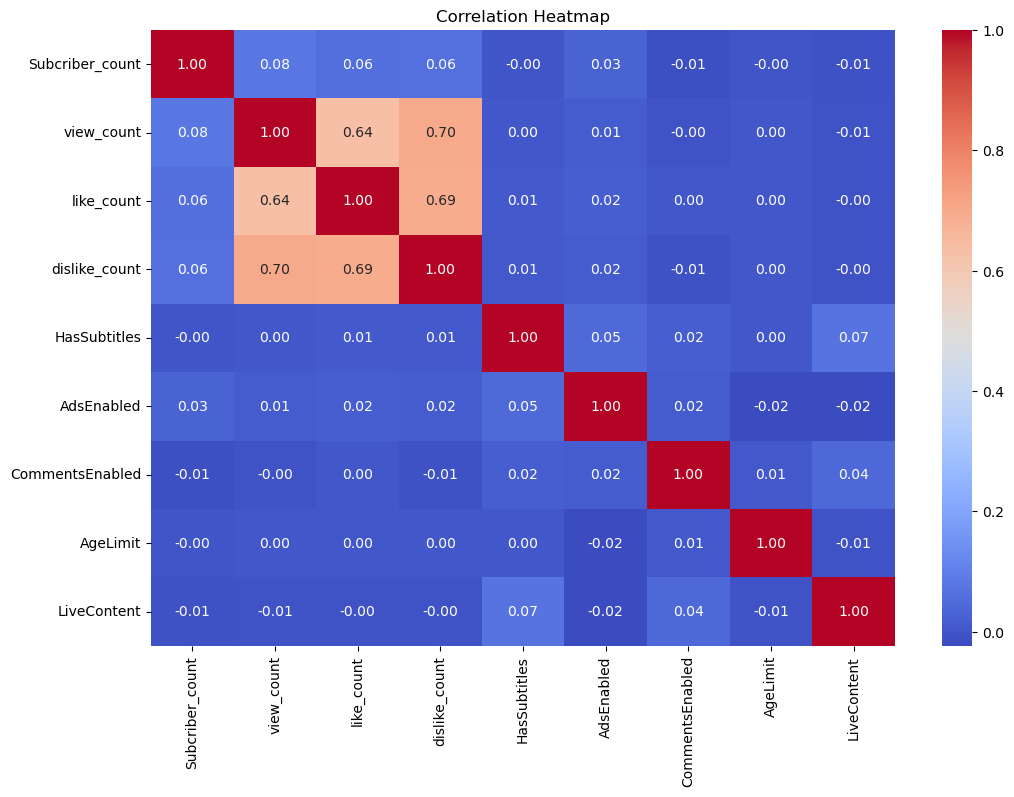

In [21]:
# Correlation plot 
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()